# Intro to Machine Learning
### Data Science Workshop
### 9 May 2015
### Sarah Braden

##Follow along 
### Slides
http://desertpy.com/pages/presentations.html
### Repo
https://github.com/desertpy/presentations

#Overview
###What is Machine Learning?
### Python and Machine Learning
### Examples

# What is Machine Learning?

<img src="https://www.informatik.uni-hamburg.de/ML/ml-wordle.jpg" alt="Drawing" style="width: 500px;"/>

## Why do you use Machine Learning?
### To make predictions and decisions

<img src="http://3.bp.blogspot.com/-TynYj7aCmak/UKtmuVx7Q9I/AAAAAAAABcM/FjIsS6-TTVQ/s1600/statistical_based_decision_making.png" alt="Drawing" style="width: 400px;"/>

## When do you use it?
### When the going gets tough

## Who uses it?
- Spam filters / Fraud detection
- Sentiment Analysis
- Computer Vision
- Speech and Handwriting Recognition

## What do you need?
- A Problem!
- Data
  - Features
  - Labels (for supervised learning)
- Programming Skillz
- Patience / Stubborness / Math 

## Are there different kinds of Machine Learning?
- Supervised Learning
    - Data has both features and labels
    - Classification (label is a class)
    - Regression (label is a continuous value)
- Unsupervised Learning
    - Data only has features
    - Clustering
    - Use clustering and then classification together!
- Feature Engineering
- Many other things

I'm still interested. Tell me more...

# Python and Machine Learning

## Fire up scikit-learn!
![](http://scipy-lectures.github.io/_images/scikit-learn-logo.png)

## scikit-learn dependencies
- Python (>= 2.6 or >= 3.3)
- NumPy (>= 1.6.1)
- SciPy (>= 0.9)

<code>pip install numpy scipy scikit-learn</code>

<img src="http://i.imgur.com/Gktl45B.jpg" alt="Drawing" style="width: 400px;"/>

## Why is scikit-learn awesome?
- Out-of-the-box Models
- Model Selection (important!)
- Data Preprocessing

## More than just scikit-learn
- PyMC (Bayesian modeling)
- Shogun (Support Vector Machines)
- Theano (Deep Learning)

[Other Python Machine Learning Libraries](http://www.cbinsights.com/blog/python-tools-machine-learning/)

# Example of a Spam Filter using Naive Bayes

Dataset
* Text files of emails from [Machine Learning in Action published by Manning](http://manning.com/pharrington)
* <code> unzip email.zip </code>
* Small dataset of ham and spam

#### Bayes Theorem
<img src="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BayesTheorom1.png" alt="Drawing" style="width: 250px;"/>

* P(A) and P(B) are the probabilities of event A and event B without regard to one other.
* P(A | B), a conditional probability, is the probability of A given that B is true.
* P(B | A), is the probability of B given that A is true.

####Mini-Example
Question: What is the probability that the latest received email is a spam message, given that it contains the word “viagra”?

####Probability of spam
P(spam|viagra) = P(viagra|spam) * P(spam) / P(viagra)

## Why is Bayes Naive?
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features.

## Data Preprocessing
Making word vectors before we use Naive Bayes to classify the word vectors

In [21]:
import re
import numpy as np
from glob import glob

# Use regular expressions to split up the sentence on anything that isn't a word or a number
regEx = re.compile('\\W*')

email_text = open('email/ham/1.txt').read()
# words sorta equal tokens
list_of_tokens = regEx.split(email_text)
list_of_tokens

['Hi',
 'Peter',
 'With',
 'Jose',
 'out',
 'of',
 'town',
 'do',
 'you',
 'want',
 'to',
 'meet',
 'once',
 'in',
 'a',
 'while',
 'to',
 'keep',
 'things',
 'going',
 'and',
 'do',
 'some',
 'interesting',
 'stuff',
 'Let',
 'me',
 'know',
 'Eugene']

In [55]:
email_text = open('email/spam/1.txt').read()
# words sorta equal tokens
list_of_tokens = regEx.split(email_text)
list_of_tokens

['',
 'Codeine',
 '15mg',
 '30',
 'for',
 '203',
 '70',
 'VISA',
 'Only',
 'Codeine',
 'Methylmorphine',
 'is',
 'a',
 'narcotic',
 'opioid',
 'pain',
 'reliever',
 'We',
 'have',
 '15mg',
 '30mg',
 'pills',
 '30',
 '15mg',
 'for',
 '203',
 '70',
 '60',
 '15mg',
 'for',
 '385',
 '80',
 '90',
 '15mg',
 'for',
 '562',
 '50',
 'VISA',
 'Only',
 '']

In [22]:
def parse_text(email_filename):
    """converts all tokens to lowercase and removes tokens < 2 characters long
    """
    email_text = open(email_filename).read()
    tokens = re.split('\\W*', email_text)
    return [token.lower() for token in tokens if len(token) > 2]


def get_all_text(email_type):
    files = glob('email/' + email_type + '/*.txt')
    return [parse_text(file) for file in files]

In [54]:
def create_vocab_list(data_set):
    vocab_set = set([])  #create empty set
    for document in data_set:
        vocab_set = vocab_set | set(document) #union of the two sets
    return list(vocab_set)

def bag_of_words(vocab_list, input_words):
    returnVec = [0]*len(vocab_list)
    for word in input_words:
        if word in vocab_list:
            returnVec[vocab_list.index(word)] += 1
    return returnVec

In [24]:
email_types = ['ham', 'spam']

ham = get_all_text('ham')
spam = get_all_text('spam')      

all_documents = ham + spam
all_labels = ['ham'] * 25 + ['spam'] * 25

vocab_list = create_vocab_list(all_documents)  #create vocabulary

# Convert the documents into word vectors
features = [bag_of_words(vocab_list, document) for document in all_documents]

print np.array(features).shape
print np.array(all_labels).shape

(50, 692)
(50,)


## We have features and labels!

In [29]:
# Cross validation
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    np.array(features), np.array(all_labels), test_size=0.3, random_state=0)

In [30]:
print "Training set:", X_train.shape, y_train.shape
print "Test set:", X_test.shape, y_test.shape

Training set: (35, 692) (35,)
Test set: (15, 692) (15,)


## Gaussian Naive Bayes

The likelihood of the features is assumed to be Gaussian.

### Gaussian

<img src="http://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg" alt="Drawing" style="width: 400px;"/>


In [31]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print "Number of mislabeled points : %d" % (y_test != y_pred).sum()
print "Score:", classifier.score(X_test, y_test)

Number of mislabeled points : 1
Score: 0.933333333333


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        ham       0.86      1.00      0.92         6
       spam       1.00      0.89      0.94         9

avg / total       0.94      0.93      0.93        15



# Example of Unsupervised Learning using K-means Clustering

<img src="http://shabal.in/visuals/kmeans/top.gif" style="width: 500px;"/>
Source: http://shabal.in/visuals/kmeans/top.gif

<img src="http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif" style="width: 500px;"/>

Source: http://simplystatistics.org/2014/02/18/k-means-clustering-in-a-gif/kmeans/

[Iris Flower Data Set](http://en.wikipedia.org/wiki/Iris_flower_data_set)
- The data set consists of 50 samples from each of three species of Iris
    - Iris setosa
    - Iris virginica
    - Iris versicolor
- Four features were measured from each sample: 
    - the length of the sepals 
    - the width of the sepals
    - the length of the petals
    - the width of the petals

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg" alt="Drawing" style="width: 200px;"/>


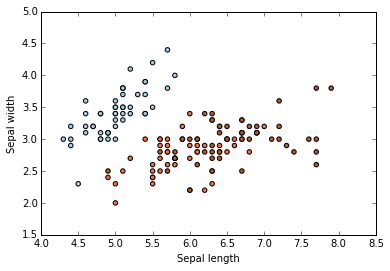

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [49]:
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data  # features
y_iris = iris.target  # labels

In [50]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

# does the kmeans clustering predict reality?
# only predicts species # 2
print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


## Learn More!
- [MIT OpenCourseware](http://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-867-machine-learning-fall-2006/)
- [Kaggle Blog: Getting Started with Python for Data Science](https://www.kaggle.com/wiki/GettingStartedWithPythonForDataScience)
- [Scikit-learn](http://scikit-learn.org/stable/)
- [Python Natural Language Toolkit (NLTK)](http://www.nltk.org/)

## Thanks!

Sarah Braden

[twitter.com/ifmoonwascookie](https://twitter.com/ifmoonwascookie)